In [1]:
pip install -U pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow-gpu==2.8.0

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install protobuf==3.20

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import re
import os
import urllib.request
from tqdm import tqdm
from transformers import BertTokenizer, TFBertForSequenceClassification

In [7]:
data = pd.read_csv('랜덤_5010개_GPT4.csv')
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5010


In [8]:
data

,labels,sentence,게시일,영상 좋아요 수,kor_sentence,작성자,댓글 작성일,댓글 좋아요 수
0,0,리니지W 전섭최초 집행검! 330억 투자한 캐릭 소개합니다 (성북동초코파이형님) ...,2023-05-05T12:45:55Z,1048,🥛롤🥛뱃🥛올한해 가장 잘한인을 한게 아닐까 싶다.. 삶의 질이 달라져 버렸습니다 고...,1M CYRUS,2023-11-06T17:52:52Z,0
1,0,배그 이후 가장 성공한 한국 FPS (feat. 넥슨),2023-11-05T13:39:51Z,2977,원격포맷은 지룡자🕷,JAY,2023-11-10T10:39:24Z,0
2,0,[피파4] 1억부터 4600억까지 몰아보기 feat. 인생강화,2022-12-06T09:11:47Z,4052,여캠 롤비제이들 왜케 못하는데 긔엽냐 지는게 꿀인줄알았는데 이기기도 하네 🇨🇬롤🇨🇬뱃🇨🇬,Neardie Born,2023-10-21T11:15:42Z,0
3,0,패치 후 피파를 떠납니다!... 피파4,2023-06-27T08:30:00Z,106,현피장인 코뚱잉 바텀을 평정한다 배헤당 일.85 접속해서 확인합시다 ?비?제?이?벳?,the dale lee lowe jr family,2023-07-24T10:26:22Z,0
4,0,아니; 떡락도 이런 떡락이 없는 로스트아크 글로벌 서버 근황;;,2023-06-11T12:00:39Z,5097,⌯비⌯제⌯이⌯벳⌯ 저에게 이런곳을 알게해줘서 너모고마워요~~,aaltu faaltu,2023-08-03T17:51:58Z,0
...,...,...,...,...,...,...,...,...
5005,1,워헤이븐 - 공식 트레일러 | 영웅적 플레이를 경험하라!,2023-09-14T07:28:58Z,15,흥해라 워헤이븐!,한선생 유튜브 Gaming HanTeacher,2023-09-14T11:57:35Z,1
5006,1,제2의나라 Cross Worlds OST '끝없는 하늘',2021-08-11T02:15:07Z,21,히사이시 조 선생님의 ost를 이렇게 피아노 솔로로 들으니 새롭게 들리네요!! 오늘...,공담 ♪,2021-10-06T07:34:27Z,3
5007,1,『126곡』 최신 우타이테 명곡만 모아 넣은 플레이리스트 【노래모음/Playlist】,2023-05-06T09:09:11Z,1072,ㅏ 진짜 띵곡들만 모아놨다..,인간,2023-09-04T06:35:47Z,0
5008,1,일반전과 재화밸런스 조정! 신규 스킨 업데이트까지 [베일드 엑스퍼트 6월22일 패치노트],2023-06-22T08:45:16Z,13,ㅠㅠ 일반전 3vs3 모드가 사라진게 아쉬울따름이네요..! 대신 업그레이드 재화가 ...,네카,2023-06-23T04:44:50Z,0


In [9]:
data[:5]

,labels,sentence,게시일,영상 좋아요 수,kor_sentence,작성자,댓글 작성일,댓글 좋아요 수
0,0,리니지W 전섭최초 집행검! 330억 투자한 캐릭 소개합니다 (성북동초코파이형님) ...,2023-05-05T12:45:55Z,1048,🥛롤🥛뱃🥛올한해 가장 잘한인을 한게 아닐까 싶다.. 삶의 질이 달라져 버렸습니다 고...,1M CYRUS,2023-11-06T17:52:52Z,0
1,0,배그 이후 가장 성공한 한국 FPS (feat. 넥슨),2023-11-05T13:39:51Z,2977,원격포맷은 지룡자🕷,JAY,2023-11-10T10:39:24Z,0
2,0,[피파4] 1억부터 4600억까지 몰아보기 feat. 인생강화,2022-12-06T09:11:47Z,4052,여캠 롤비제이들 왜케 못하는데 긔엽냐 지는게 꿀인줄알았는데 이기기도 하네 🇨🇬롤🇨🇬뱃🇨🇬,Neardie Born,2023-10-21T11:15:42Z,0
3,0,패치 후 피파를 떠납니다!... 피파4,2023-06-27T08:30:00Z,106,현피장인 코뚱잉 바텀을 평정한다 배헤당 일.85 접속해서 확인합시다 ?비?제?이?벳?,the dale lee lowe jr family,2023-07-24T10:26:22Z,0
4,0,아니; 떡락도 이런 떡락이 없는 로스트아크 글로벌 서버 근황;;,2023-06-11T12:00:39Z,5097,⌯비⌯제⌯이⌯벳⌯ 저에게 이런곳을 알게해줘서 너모고마워요~~,aaltu faaltu,2023-08-03T17:51:58Z,0


In [10]:
data = data.drop(['sentence', '게시일', '영상 좋아요 수', '작성자', '댓글 작성일', '댓글 좋아요 수'], axis=1)

In [11]:
data[:5]

,labels,kor_sentence
0,0,🥛롤🥛뱃🥛올한해 가장 잘한인을 한게 아닐까 싶다.. 삶의 질이 달라져 버렸습니다 고...
1,0,원격포맷은 지룡자🕷
2,0,여캠 롤비제이들 왜케 못하는데 긔엽냐 지는게 꿀인줄알았는데 이기기도 하네 🇨🇬롤🇨🇬뱃🇨🇬
3,0,현피장인 코뚱잉 바텀을 평정한다 배헤당 일.85 접속해서 확인합시다 ?비?제?이?벳?
4,0,⌯비⌯제⌯이⌯벳⌯ 저에게 이런곳을 알게해줘서 너모고마워요~~


In [12]:
print('결측값 여부 :',data.isnull().values.any())

결측값 여부 : False


In [13]:
print('kor_sentence 열의 유니크한 값 :',data['kor_sentence'].nunique())

kor_sentence 열의 유니크한 값 : 4845


In [14]:
data = data.dropna()

In [15]:
print('결측값 여부 :',data.isnull().values.any())

결측값 여부 : False


In [16]:
print('kor_sentence 열의 유니크한 값 :',data['kor_sentence'].nunique())

kor_sentence 열의 유니크한 값 : 4845


In [17]:
# 중복된 행을 보는 코드
duplicate = data[data.duplicated()]

In [18]:
duplicate

,labels,kor_sentence
197,0,부랴부랴 출근준비 하고 바쁘다고 할때 난 🧿롤🧿뱃🧿 떄문에 집에서 느긋하게 늦잠자면...
204,0,슈퍼꾸랙 이상호리 정글 플레이서 꾸르르르잼 뱃하면서 구경해요 이상호 패가 정🧍‍♀️...
216,0,🍽️롤🍽️뱃🍽️옷장에 후질근한 옷 이며 신발이며 다갓다 버리고 썌걸로 쫙 갈아 엎자...
494,0,"근데 하나같이 디자인 왤케 쉰내남? (메구우사 클래식, 프리미엄 제외) 틀딱겜 냄새..."
570,0,⌯비⌯제⌯이⌯벳⌯ 저에게 이런곳을 알게해줘서 너모고마워요~~
...,...,...
5005,1,흥해라 워헤이븐!
5006,1,히사이시 조 선생님의 ost를 이렇게 피아노 솔로로 들으니 새롭게 들리네요!! 오늘...
5007,1,ㅏ 진짜 띵곡들만 모아놨다..
5008,1,ㅠㅠ 일반전 3vs3 모드가 사라진게 아쉬울따름이네요..! 대신 업그레이드 재화가 ...


In [19]:
# 중복 제거
data.drop_duplicates(subset=['kor_sentence'], inplace=True)
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 4845


<Axes: >

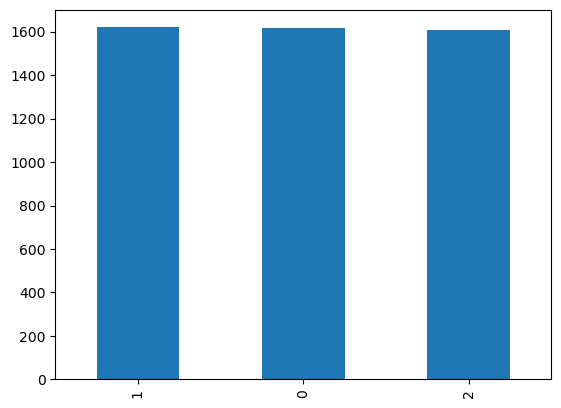

In [20]:
data['labels'].value_counts().plot(kind='bar')

In [21]:
data['labels'].value_counts()

1    1620
0    1618
2    1607
Name: labels, dtype: int64

In [22]:
#추가
blank_rows = data['labels'].astype(str).str.strip() == ''
#기존
data = data[~blank_rows]

In [23]:
data['labels'].value_counts()

1    1620
0    1618
2    1607
Name: labels, dtype: int64

<Axes: >

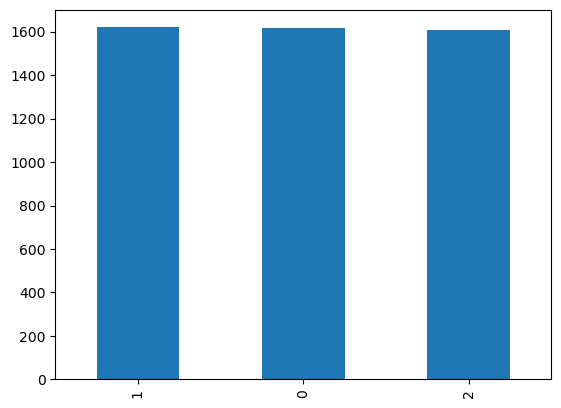

In [24]:
data['labels'].value_counts().plot(kind='bar')

In [25]:
print('레이블의 분포')
print(data.groupby('labels').size().reset_index(name='count'))

레이블의 분포
   labels  count
0       0   1618
1       1   1620
2       2   1607


In [26]:
print(f'긍정의 비율 = {round(data["labels"].value_counts()[0]/len(data) * 100,3)}%')
print(f'중립의 비율 = {round(data["labels"].value_counts()[1]/len(data) * 100,3)}%')
print(f'부정의 비율 = {round(data["labels"].value_counts()[2]/len(data) * 100,3)}%')

긍정의 비율 = 33.395%
중립의 비율 = 33.437%
부정의 비율 = 33.168%


In [27]:
X_data = data['kor_sentence']
y_data = data['labels']
print('본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

본문의 개수: 4845
레이블의 개수: 4845


In [28]:
# X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=0, stratify=y_data)
# X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, random_state=0, stratify=y_data)

# 데이터 분할 부분 수정
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)


In [29]:
print('훈련 샘플의 개수 :', len(X_train))
print('테스트 샘플의 개수 :', len(X_val))

훈련 샘플의 개수 : 3876
테스트 샘플의 개수 : 969


In [30]:
print('--------훈련 데이터의 비율-----------')
print(f'긍정 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'중립 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print(f'부정 = {round(y_train.value_counts()[2]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
긍정 = 33.385%
중립 = 33.437%
부정 = 33.179%


In [31]:
print('--------테스트 데이터의 비율-----------')
print(f'긍정 = {round(y_val.value_counts()[0]/len(y_val) * 100,3)}%')
print(f'중립 = {round(y_val.value_counts()[1]/len(y_val) * 100,3)}%')
print(f'부정 = {round(y_val.value_counts()[2]/len(y_val) * 100,3)}%')

--------테스트 데이터의 비율-----------
긍정 = 33.437%
중립 = 33.437%
부정 = 33.127%


In [32]:
max_seq_len = 128

In [33]:
tokenizer = BertTokenizer.from_pretrained('klue/bert-base')

In [34]:
# convert_examples_to_features 함수 수정
def convert_examples_to_features(examples, labels, max_seq_len, tokenizer):
    input_ids, attention_masks, token_type_ids, data_labels = [], [], [], []

    for example, label in tqdm(zip(examples, labels), total=len(examples)):
        # input_id는 워드 임베딩을 위한 문장의 정수 인코딩
        input_id = tokenizer.encode(example, max_length=max_seq_len, pad_to_max_length=True)

        # attention_mask는 실제 단어가 위치하면 1, 패딩의 위치에는 0인 시퀀스.
        padding_count = input_id.count(tokenizer.pad_token_id)
        attention_mask = [1] * (max_seq_len - padding_count) + [0] * padding_count

        # token_type_id은 세그먼트 인코딩
        token_type_id = [0] * max_seq_len

        assert len(input_id) == max_seq_len, "Error with input length {} vs {}".format(len(input_id), max_seq_len)
        assert len(attention_mask) == max_seq_len, "Error with attention mask length {} vs {}".format(len(attention_mask), max_seq_len)
        assert len(token_type_id) == max_seq_len, "Error with token type length {} vs {}".format(len(token_type_id), max_seq_len)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        data_labels.append(label)

    input_ids = np.array(input_ids, dtype=int)
    attention_masks = np.array(attention_masks, dtype=int)
    token_type_ids = np.array(token_type_ids, dtype=int)

    data_labels = np.asarray(data_labels, dtype=np.int32)

    return (input_ids, attention_masks, token_type_ids), data_labels

In [35]:
train_X, train_y = convert_examples_to_features(X_train, y_train, max_seq_len=max_seq_len, tokenizer=tokenizer)

  0%|          | 0/3876 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/ubuntu/anaconda3/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 3876/3876 [00:00<00:00, 4047.6

In [36]:
# 수정된 데이터를 사용하여 학습 및 검증 데이터 생성
train_X, train_y = convert_examples_to_features(X_train, y_train, max_seq_len=max_seq_len, tokenizer=tokenizer)
val_X, val_y = convert_examples_to_features(X_val, y_val, max_seq_len=max_seq_len, tokenizer=tokenizer)

100%|██████████| 969/969 [00:00<00:00, 4139.53it/s]


In [37]:
input_id = train_X[0][0]
attention_mask = train_X[1][0]
token_type_id = train_X[2][0]
label = train_y[0]

print('단어에 대한 정수 인코딩 :',input_id)
print('어텐션 마스크 :',attention_mask)
print('세그먼트 인코딩 :',token_type_id)
print('각 인코딩의 길이 :', len(input_id))
print('정수 인코딩 복원 :',tokenizer.decode(input_id))
print('레이블 :',label)

단어에 대한 정수 인코딩 : [    2 25547  4388     5     3     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
어텐션 마스크 : [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [38]:
# TPU를 사용할 수 있는지 확인합니다
if 'COLAB_TPU_ADDR' in os.environ:
    # TPU가 사용 가능한 경우 TPU를 설정합니다
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)

    strategy = tf.distribute.experimental.TPUStrategy(resolver)
    print('TPU를 사용합니다.')
else:
    # TPU가 사용 불가능한 경우 CUDA GPU를 사용합니다
    physical_devices = tf.config.list_physical_devices('GPU')
    if len(physical_devices) == 0:
        raise RuntimeError("GPU를 찾을 수 없습니다. TensorFlow가 올바르게 설치되어 있는지 확인하세요.")

    # 모든 GPU 메모리를 필요에 따라 동적으로 할당하도록 설정합니다
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)

    # CUDA GPU를 사용하는 경우 문자열 "/gpu:0"을 전달합니다
    strategy = tf.distribute.OneDeviceStrategy("/gpu:0")
    print('CUDA GPU를 사용합니다.')

2023-11-17 07:07:05.726201: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-17 07:07:05.729924: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-17 07:07:05.731941: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-17 07:07:05.734665: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

CUDA GPU를 사용합니다.


node zero
2023-11-17 07:07:05.737310: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-17 07:07:05.739292: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-17 07:07:07.911884: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-17 07:07:07.913437: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-17 07:07:07.914695: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node r

In [39]:
with strategy.scope():
  model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=3, from_pt=True)
  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
  loss = tf.keras.losses.SparseCategoricalCrossentropy()
  model.compile(optimizer=optimizer, loss=loss, metrics = ['accuracy'])
#   model.compile(optimizer=optimizer, loss=model.compute_loss, metrics = ['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [40]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [42]:
# 모델 학습 부분 수정
# EarlyStopping 및 ModelCheckpoint 설정
early_stopping = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=100, 
    restore_best_weights=True
)

checkpoint_path = "GPT4_분류모델(02).h5"
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# 모델 학습
model.fit(
    train_X, train_y, epochs=200, batch_size=32, validation_data=(val_X, val_y),  # 검증 데이터 추가
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/200


2023-11-17 07:07:09.823169: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_4465"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\020FlatMapDataset:4"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_DATASET
    args {
      type_id: TFT_PRODUCT

122/122 [==============================] - ETA: 0s - loss: 1.4732 - accuracy: 0.3480

2023-11-17 07:08:50.639634: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_24624"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\021FlatMapDataset:27"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_DATASET
    args {
      type_id: TFT_PRODU


Epoch 1: val_accuracy improved from -inf to 0.37564, saving model to GPT4_분류모델(02).h5
122/122 [==============================] - 113s 792ms/step - loss: 1.4732 - accuracy: 0.3480 - val_loss: 1.0975 - val_accuracy: 0.3756
Epoch 2/200
122/122 [==============================] - ETA: 0s - loss: 1.1008 - accuracy: 0.3555
Epoch 2: val_accuracy did not improve from 0.37564
122/122 [==============================] - 93s 760ms/step - loss: 1.1008 - accuracy: 0.3555 - val_loss: 1.0986 - val_accuracy: 0.3571
Epoch 3/200
122/122 [==============================] - ETA: 0s - loss: 1.0986 - accuracy: 0.3393
Epoch 3: val_accuracy did not improve from 0.37564
122/122 [==============================] - 93s 762ms/step - loss: 1.0986 - accuracy: 0.3393 - val_loss: 1.0986 - val_accuracy: 0.3571
Epoch 4/200
122/122 [==============================] - ETA: 0s - loss: 1.0983 - accuracy: 0.3333
Epoch 4: val_accuracy did not improve from 0.37564
122/122 [==============================] - 93s 762ms/step - loss: 

122/122 [==============================] - ETA: 0s - loss: 1.0986 - accuracy: 0.3367
Epoch 30: val_accuracy did not improve from 0.37564
122/122 [==============================] - 93s 762ms/step - loss: 1.0986 - accuracy: 0.3367 - val_loss: 1.0986 - val_accuracy: 0.3395
Epoch 31/200
122/122 [==============================] - ETA: 0s - loss: 1.0986 - accuracy: 0.3398
Epoch 31: val_accuracy did not improve from 0.37564
122/122 [==============================] - 93s 762ms/step - loss: 1.0986 - accuracy: 0.3398 - val_loss: 1.0986 - val_accuracy: 0.3395
Epoch 32/200
122/122 [==============================] - ETA: 0s - loss: 1.0986 - accuracy: 0.3302
Epoch 32: val_accuracy did not improve from 0.37564
122/122 [==============================] - 93s 762ms/step - loss: 1.0986 - accuracy: 0.3302 - val_loss: 1.0986 - val_accuracy: 0.3395
Epoch 33/200
122/122 [==============================] - ETA: 0s - loss: 1.0986 - accuracy: 0.3300
Epoch 33: val_accuracy did not improve from 0.37564
122/122 [==

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_X, test_y, batch_size=1024)